# Jane Chinwuko
# Batch number: DS2307

# This is a Regression Problem

## Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
#### Input features-
1.	W - This indicates the number of Wins.
2.	R - This indicates Runs scored.
3.	AB - This means At bat or time at bat.
4.	H - This means Hit.
5.	2B - Doubles.
6.	3B - This means a Triple.
7.	HR - This means Home runs.
8.	BB - This means Base on balls (also called a "walk").
9.	SO - Also denoted as "K" means Strikeout.
10.	SB - This means Stolen bases.
11.	RA - This means Run allowed or scored.
12.	ER - This means Earned run.
13.	ERA - This means Earned Run Average.
14.	CG - This means Complete Game.
15.	SHO - This means Shutout.
16.	SV - This means Saves.
17.	E - This means Errors.

#### Output: Number of predicted wins (W)


In [1]:
# Imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
#loaded the dataset to a Pandas DataFrame
base_ball = pd.read_csv('baseball.csv')

## Exploratory Data Analysis

In [3]:
#Viewing the first 30 rows in our dataset
base_ball.head(30)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
#Viewing the last 30 rows in our dataset
base_ball.tail(30)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
#Generating the descriptive statistics of all the features in the dataset
base_ball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


There is no missing value as the counts have same value.

In [6]:
# Viewing the dimensions of the array
base_ball.shape

(30, 17)

This dataset contains 30 rows and 17 columns (made up of the independent and target variables)

In [7]:
#Viewing the columns present in the dataset
columns = base_ball.columns
columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

W is the target variable while others are the independant variables.

In [9]:
#Displays the basic information about the columns in the dataset
base_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


One of the features is floats, 16 are integers. Our target variable is the W column. There is no need to make changes to the datatype because they are suitable for building of our model.

In [10]:
#Displays the unique value for all features
base_ball.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [11]:
def columns_values(new_df):
    for i in new_df.columns:
        print(new_df[i].value_counts())
        print('\n')
        
columns_values(base_ball)

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

From the value counts of all the columns, we can see that there are no null values.

In [12]:
#This returns the count of unique occurrences in the W column
base_ball['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

Most of the win values occured once.

<AxesSubplot:>

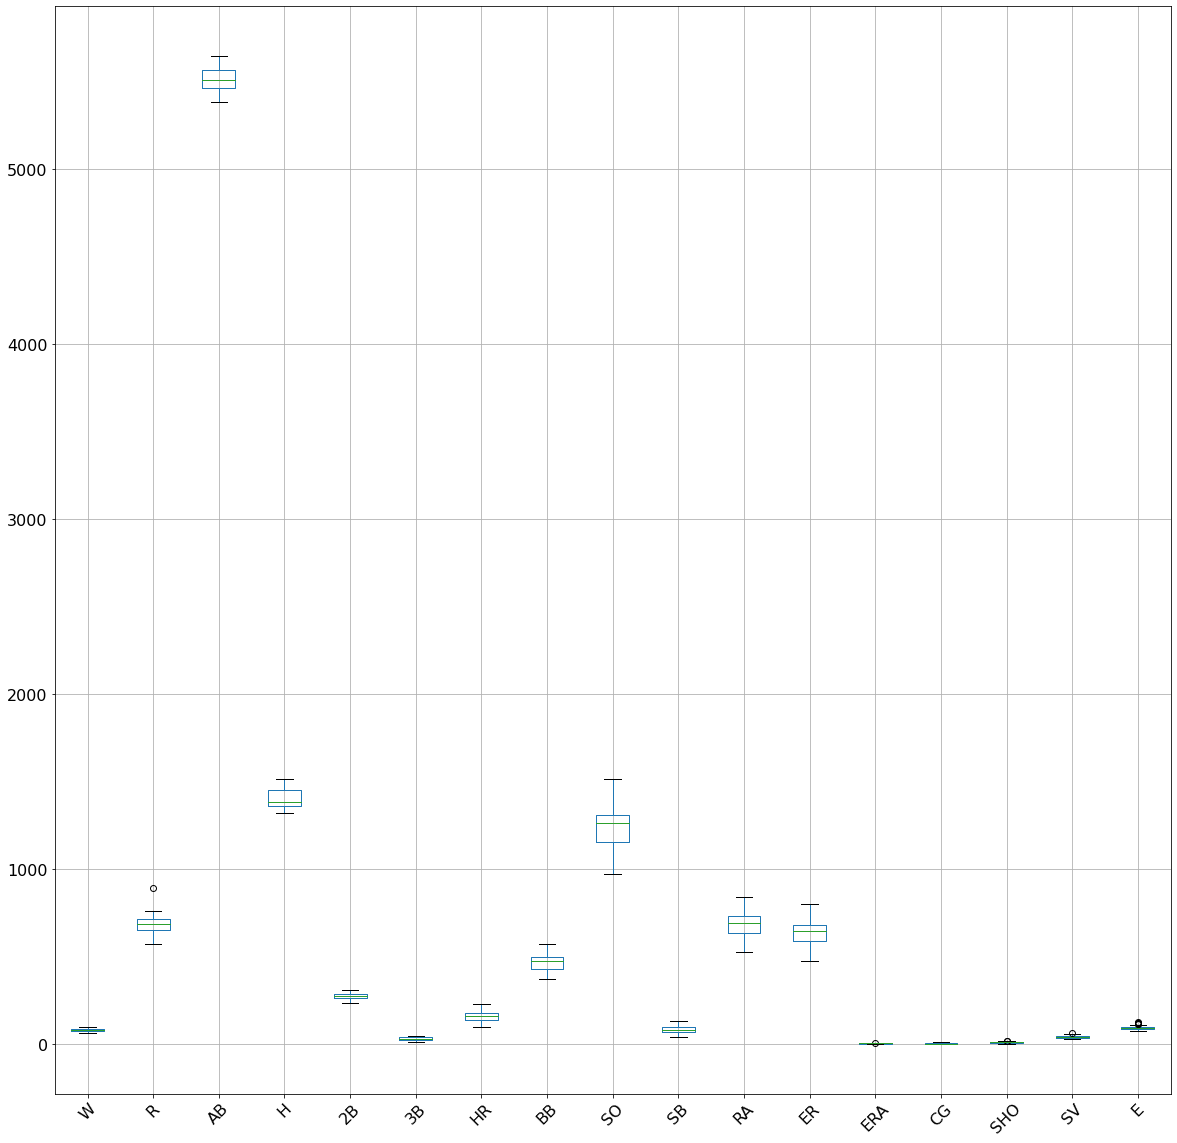

In [13]:
# Plotting the columns using boxplot to check if outliers have been removed
base_ball.boxplot(column=base_ball.columns.tolist(), figsize=(20,20), grid=True, rot=45, fontsize=16)

We can see an outlier in the variable Run. We will not remove it because we have limited data to work with.

## Data Visualization

C:\Users\Omen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The distribution of the W column')

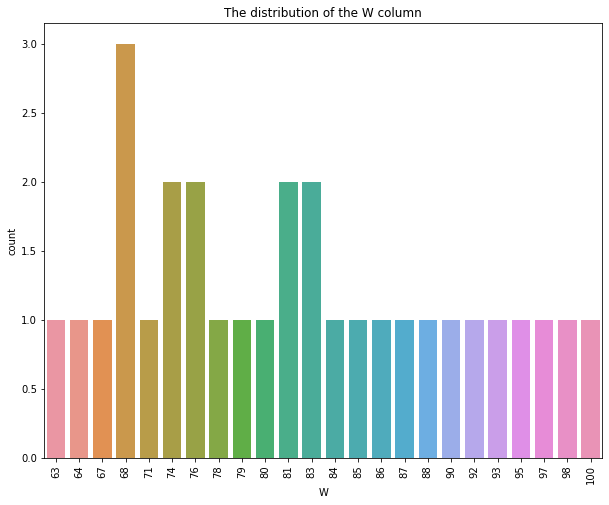

In [14]:
#Visualizing the W column
plt.figure(figsize=(10,8))
sns.countplot(base_ball['W'])
plt.xticks(rotation = 90)
plt.title('The distribution of the W column')

Three teams had 68 wins. Only one team had the highest win which is 100.

<Figure size 1440x1440 with 0 Axes>

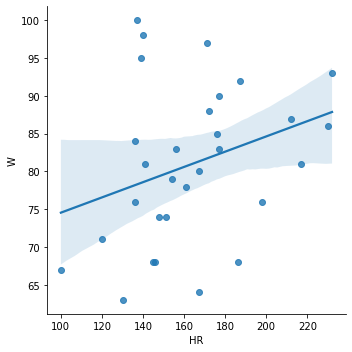

In [15]:
# lmplot showing the relationship between Home Runs and Wins
plt.figure(figsize=(20,20))
sns.lmplot(x='HR',y='W',data=base_ball)

The plot shows that there's a positive correlation between home runs and win. The team with more runs is likely to win the game. 

<Figure size 1440x1440 with 0 Axes>

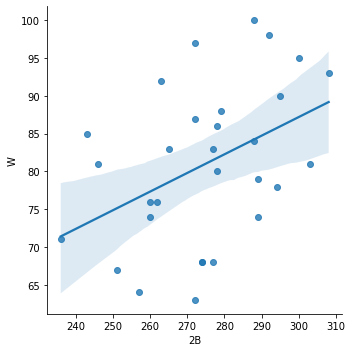

In [16]:
# lmplot showing the relationship between double plays and win in baseball
plt.figure(figsize=(20,20))
sns.lmplot(x='2B',y='W',data=base_ball)

The plot shows that there's a positive correlation between double play and win.

<Figure size 1440x1440 with 0 Axes>

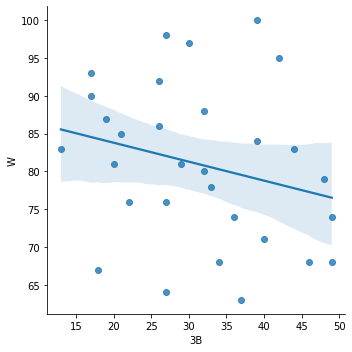

In [17]:
# lmplot showing the relationship between Tripe play and win in baseball
plt.figure(figsize=(20,20))
sns.lmplot(x='3B',y='W',data=base_ball)

The plot shows that there's a negative correlation between triple play and win.

Text(0.5, 1.0, 'Correlation Heatmap')

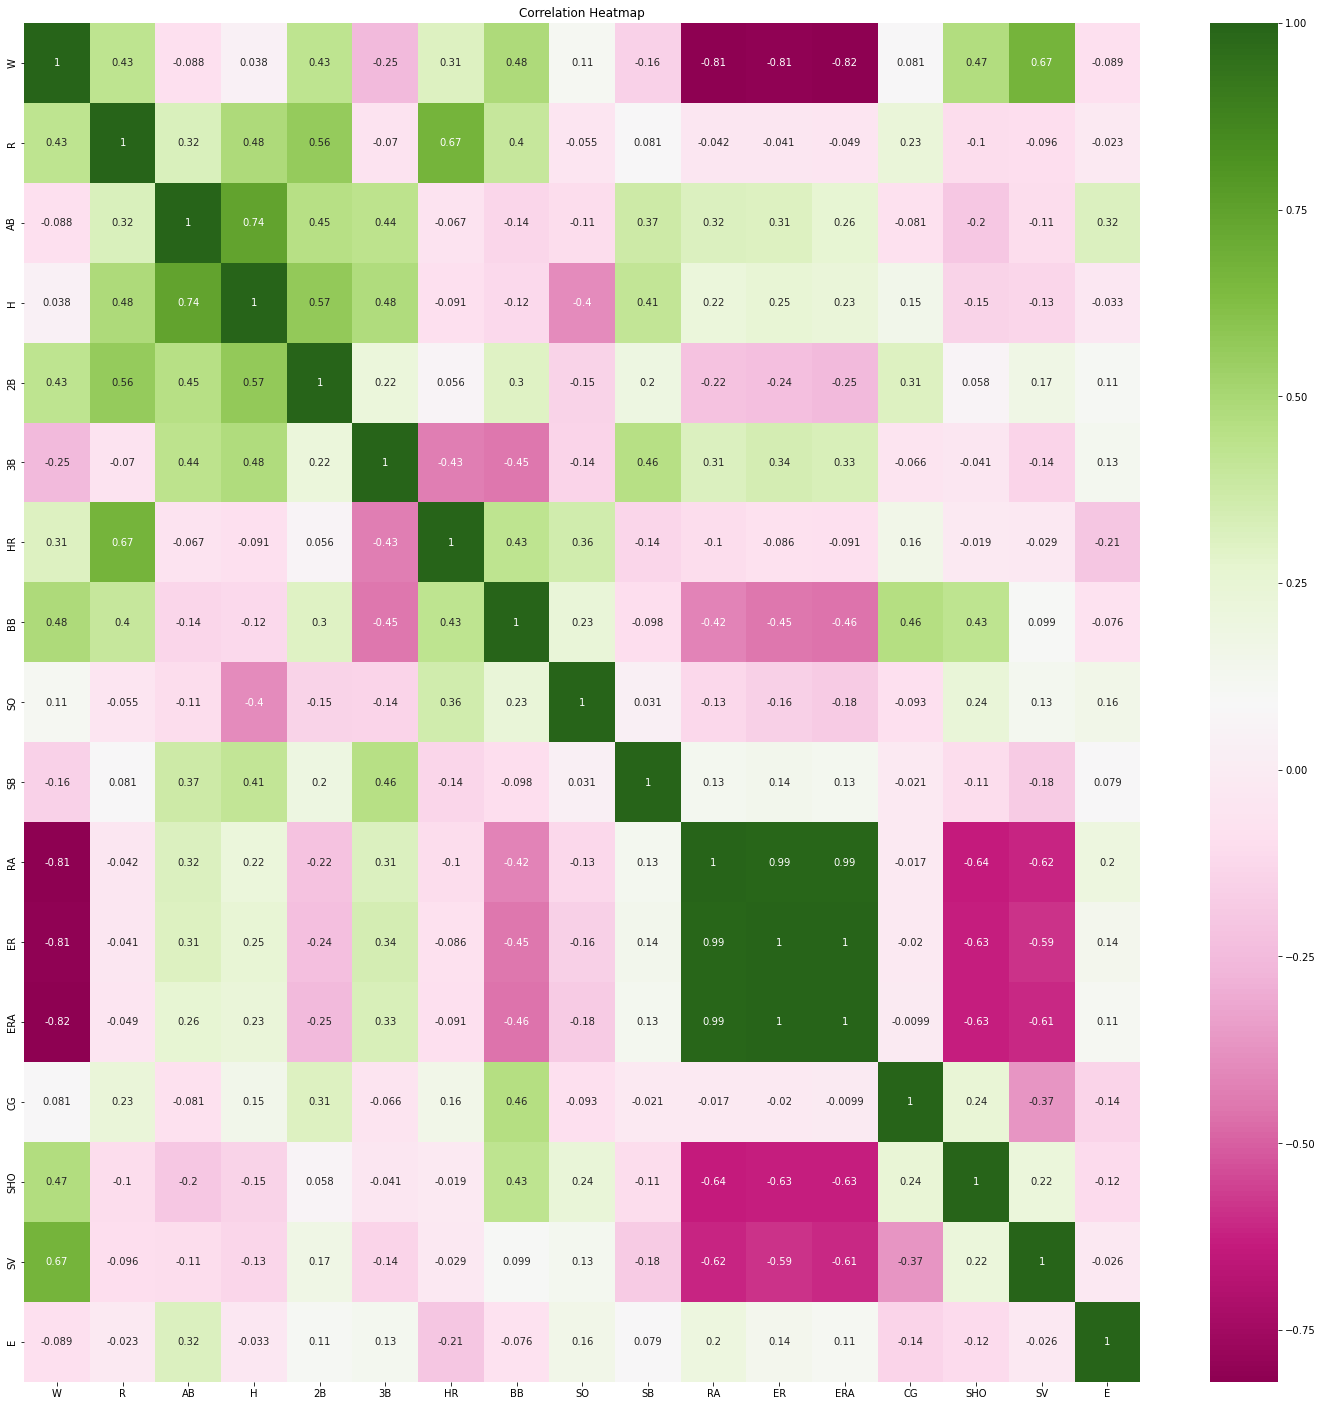

In [18]:
# Using heatmap to visualize the correlation between the features.
plt.figure(figsize=(25,25))
sns.heatmap(base_ball.corr(), annot=True, cmap='PiYG')
plt.title('Correlation Heatmap')


There's high correlation between ER, ERA and RA. We shall deal with this multicollinearity using the VIF.

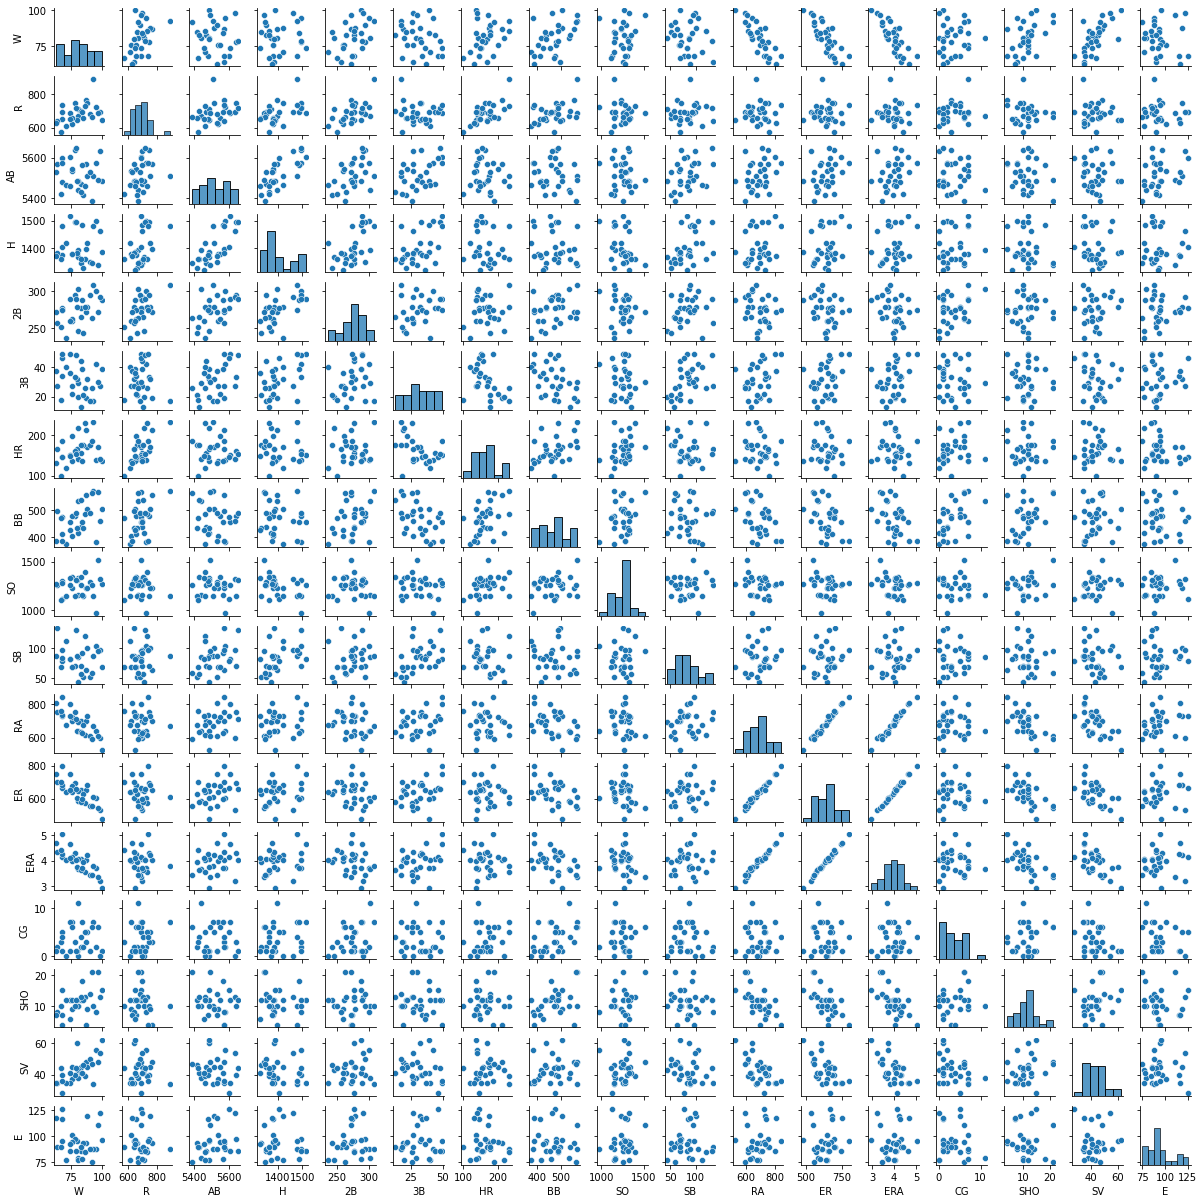

In [19]:
#pairplot showing the relationships between features and the target variable
sns.pairplot(base_ball, diag_kind="hist", height=1, palette = 'husl')

#### From the pairplot, we can say that:
##### 1) The variables R, HR, 2B, SV, SHO, and BB are positively linearly correlated with the number of wins.
##### 2) The variables RA, ER and ERA are negatively linearly correlated with the number of wins.
##### 3) The other variables have no correlation with the number of wins.

The data distribution of most of the features are almost close to normal. The column E, CG, R are slightly skewed to the right.

## Data Preprocessing

In [20]:
#checking for missing values
base_ball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no missing values.

In [21]:
# checking for skewness
# created a dataframe to store our variables and the skewness value
skew_data = base_ball.skew().to_frame()
skew_data.index.names = ['columns']
skew_data.columns = ['value']
skew_data

,value
columns,
W,0.047089
R,1.200786
AB,0.183437
H,0.670254
2B,-0.230650
3B,0.129502
HR,0.516441
BB,0.158498
SO,-0.156065


A skewness of between -0.5 and 0.5 indicates that the data are almost symmetrical. The data are significantly skewed if the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1 (positive skewed). The data are highly skewed if the skewness is less than -1 (negative skewed) or more than 1 (positive skewed).

From the above explanation, we can say that most of our features are almost symmetrical because they fall within the value -0.5 and 0.5. Columns CG,SHO,SV,E are positively slightly skewed.

In [22]:
# Printing the total number of duplicates across all the columns
duplicated = base_ball.duplicated()

print("The number of duplicates in the dataset is:", base_ball.duplicated().sum())

The number of duplicates in the dataset is: 0


In [23]:
# splitting our data into X(Independant variables) and y(target variable)
X = base_ball.drop(['W'],axis = 1)
y = base_ball['W']
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


We dropped the Wins column from the list of independent variables and assigned it to y as our target variable. 

In [24]:
#Scaling of our dataset
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X)
X_test=scaler.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.474843,0.719697,0.905759,0.888889,0.805556,0.295455,0.041026,0.000000,0.666667,0.363636,0.383178,0.376190,0.181818,0.235294,0.823529,0.254902
1,0.386792,0.310606,0.130890,0.569444,0.861111,0.424242,0.328205,0.533945,0.288889,0.548589,0.545171,0.538095,0.181818,0.470588,0.500000,0.215686
2,0.301887,0.204545,0.371728,0.930556,0.444444,0.310606,0.810256,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.352941,0.294118,0.078431
3,0.154088,0.560606,0.298429,0.333333,0.388889,0.272727,0.148718,0.473394,0.266667,0.551724,0.514019,0.495238,0.636364,0.294118,0.264706,0.509804
4,0.364780,0.833333,1.000000,0.736111,1.000000,0.386364,0.410256,0.524771,0.433333,0.871473,0.834891,0.809524,0.636364,0.470588,0.205882,0.215686
5,1.000000,0.469697,0.816754,1.000000,0.111111,1.000000,1.000000,0.326606,0.488889,0.454545,0.408100,0.409524,0.636364,0.352941,0.176471,0.254902
6,0.600629,0.689394,0.382199,0.500000,0.166667,0.848485,0.917949,0.466055,0.211111,0.542320,0.542056,0.519048,0.272727,0.000000,0.588235,0.352941
7,0.440252,0.378788,0.240838,0.138889,0.194444,0.886364,0.220513,0.656881,0.000000,0.526646,0.523364,0.528571,0.000000,0.352941,0.441176,0.039216
8,0.223270,0.378788,0.308901,0.583333,0.527778,0.507576,0.312821,0.618349,0.477778,0.366771,0.392523,0.380952,0.090909,0.470588,0.941176,0.392157
9,0.550314,0.965909,0.895288,0.805556,0.555556,0.462121,0.528205,0.321101,0.300000,0.714734,0.672897,0.652381,0.272727,0.352941,0.352941,0.431373


We used MinMaxScaler to convert our data to the same scale(0 to 1). 

In [25]:
#checking the VIF value for multicollinearity between our variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x_input):
# Calculating VIF
    vif_df = pd.DataFrame()
    vif_df["Variables"] = x_input.columns
    vif_df["VIF Value"] = [variance_inflation_factor(x_input.values, i) for i in range(x_input.shape[1])]

    return(vif_df)
X = x.iloc[:]
calc_vif(X)

,Variables,VIF Value
0,R,57.331295
1,AB,43.344179
2,H,27.573377
3,2B,23.010036
4,3B,13.493803
5,HR,49.987440
6,BB,14.299124
7,SO,21.879033
8,SB,6.577128
9,RA,961.243957


We have columns with high VIF values. We shall drop the columns with the highest value and see what happens.

In [26]:
#Dropping density(has highest vif value)
X = x.drop(['ER','ERA','R','AB','SO','2B','3B'],axis=1)

calc_vif(X)


,Variables,VIF Value
0,H,4.091650
1,HR,6.348644
2,BB,7.972359
3,SB,4.793723
4,RA,6.472020
5,CG,4.596899
6,SHO,5.624809
7,SV,5.068935
8,E,3.402376


The accuracy and stability of the regression model can be increased by removing variables with high VIF values, which can also assist in reducing multicollinearity. We dropped the ER column, but the values of some features were still high. We dropped an additional column ERA. The values were still high. Dropping more columns will leave us with limited data, affecting our model building as we will not have enough data to train our model. We went ahead to train the model but noticed there was overfitting.

On the other hand, we decided to drop all the values with high VIF values since leaving them did not improve our model.

# Model Building

In [27]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((21, 9), (9, 9), (21,), (9,))

We splitted our data in X_train, X_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 70% of our data will be used to train the model while 30% will be used for model validation.

## 1. AdaBoost Regressor

In [28]:
#AdaBoost Algorithm
ad = AdaBoostRegressor()
ad.fit(X_train, y_train)
ypredad = ad.predict(X_test)
train_predad = ad.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypredad)
msqe = metrics.mean_squared_error(y_test, ypredad)
r2_score = metrics.r2_score(y_test, ypredad)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypredad))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predad))
print('\n')


mean_absolute_error :  6.364197530864197
mean_squared_error  :  54.56824417009602
root_mean_absolute_error 7.387032162519398
R2_score            :  0.5947902660636434
R2_score on training data :  0.9884906919086324




### Cross Validation Score AdaBoost Regressor

In [29]:
cv_score2 = cross_val_score(ad,X,y, cv=5, scoring = 'r2')
print(cv_score2)
print(cv_score2.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypredad)- cv_score2.mean()}')

[-0.16194833 -5.25699746  0.06423236  0.11111408  0.86451591]
-0.8758166887215684
The difference between the R2 score and the cross validation score is: 1.4706069547852119


## 2. Gradient Boosting Regressor

In [30]:
#Gradient Boosting Algorithm
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
ypred = gb.predict(X_test)
train_pred = gb.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred)
msqe = metrics.mean_squared_error(y_test, ypred)
r2_score = metrics.r2_score(y_test, ypred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_pred))
print('\n')

mean_absolute_error :  6.681267038728418
mean_squared_error  :  58.060181548616
root_mean_absolute_error 7.619723193700412
R2_score            :  0.5688600380053267
R2_score on training data :  0.9999997447053021




### Cross Validation Score for Gradient Boosting Regressor

In [31]:

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(gb,X,y, cv=5, scoring = 'r2')
print(cv_score)
print(cv_score.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred)- cv_score.mean()}')

[-0.07201913 -8.39367196  0.20729448  0.26762302  0.61502887]
-1.4751489454567306
The difference between the R2 score and the cross validation score is: 2.0440089834620574


## 3. Random Forest Regressor

In [32]:
#Random Forest Regressor Algorithm
random_for= RandomForestRegressor()
random_for.fit(X_train, y_train)

y_pred = random_for.predict(X_test)
train_predrd = random_for.predict(X_train)
mse = metrics.mean_absolute_error(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  5.776666666666667
mean_squared_error  :  43.58521111111112
root_mean_absolute_error 6.601909656388152
R2_score            :  0.6763474422442244
R2_score on training data :  0.903979820923197




### Cross Validation Score for Random Forest Regressor

In [33]:
from sklearn.model_selection import cross_val_score
cv_score1 = cross_val_score(random_for,X,y, cv=5, scoring = 'r2')
print(cv_score1)
print(cv_score1.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,y_pred)- cv_score1.mean()}')

[ 0.09695577 -4.57374351  0.31927315  0.23897733  0.83894988]
-0.6159174745644623
The difference between the R2 score and the cross validation score is: 1.2922649168086866


## 4. Decision Tree Regressor

In [34]:
#Decision Tree Algorithm
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
ypred_dc = dec_tree.predict(X_test)
train_preddc = dec_tree.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_dc)
msqe = metrics.mean_squared_error(y_test, ypred_dc)
r2_score = metrics.r2_score(y_test, ypred_dc)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_dc))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_preddc))
print('\n')

mean_absolute_error :  8.0
mean_squared_error  :  85.33333333333333
root_mean_absolute_error 9.237604307034012
R2_score            :  0.36633663366336633
R2_score on training data :  1.0




### Cross Validation Score Decision Tree Regressor

In [35]:
cv_score2 = cross_val_score(dec_tree,X,y, cv=5, scoring = 'r2')
print(cv_score2)
print(cv_score2.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_dc)- cv_score2.mean()}')

[ -1.4991119  -12.80916031  -0.23038842  -0.51836735   0.67514793]
-2.876376009455759
The difference between the R2 score and the cross validation score is: 3.242712643119125


## 5. Linear Regression

In [36]:
# Linear Regression Algorithm
lin_regre = LinearRegression()
lin_regre.fit(X_train, y_train)
ypred_lr = lin_regre.predict(X_test)
train_predlr = lin_regre.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_lr)
msqe = metrics.mean_squared_error(y_test, ypred_lr)
r2_score = metrics.r2_score(y_test, ypred_lr)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_lr))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predlr))
print('\n')

mean_absolute_error :  4.908835992497997
mean_squared_error  :  37.205637642637456
root_mean_absolute_error 6.099642419243726
R2_score            :  0.7237205125546724
R2_score on training data :  0.908556159954191




### Cross Validation Score for Linear Regression

In [37]:
cv_score3 = cross_val_score(lin_regre,X,y, cv=5, scoring = 'r2')
print(cv_score3)
print(cv_score3.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_lr)- cv_score3.mean()}')

[ 0.58662904 -2.14265051  0.80588737  0.74995772  0.81045304]
0.16205533280078366
The difference between the R2 score and the cross validation score is: 0.5616651797538887


## Model Selection

Our best model is Linear Regression. It was selected based on the difference between our r2 score and cross validation scores obtained for each model. The model which had the lowest result from the substraction was choosen as the algorithm for building our model. Although, we noticed overfitting in all the models used as the model was performing well on the training data and not on the testing data. Limited size of data used is one major cause of overfitting. Let's try tunning the model chosen and see if there will be any improvement.

### Hyperparameter tuning using the Grid search method

In [38]:

from sklearn.model_selection import GridSearchCV

model_best = LinearRegression()

model_param = {
        "fit_intercept": ['boolean','True'],
        "copy_X": ['boolean','True'],
        "n_jobs": [None],
        "positive": ['boolean']
    }

In [39]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['boolean', 'True'],
                         'fit_intercept': ['boolean', 'True'], 'n_jobs': [None],
                         'positive': ['boolean']})

In [40]:
#display the best parameters from the search
print("The best fit_intercept is : " + str(gd_search.best_params_["fit_intercept"]),
     "\nThe best copy_X: " + str(gd_search.best_params_["copy_X"]),
     "\nThe best n_jobs: " + str(gd_search.best_params_["n_jobs"]),
     "\nThe best positive: " + str(gd_search.best_params_["positive"]))

The best fit_intercept is : boolean 
The best copy_X: boolean 
The best n_jobs: None 
The best positive: boolean


In [41]:
#train the model with the selected parameters
New_model = LinearRegression(fit_intercept  = 'boolean', copy_X = 'boolean', n_jobs = None, positive = 'boolean')

In [42]:
#Decision Tree Algorithm
New_model.fit(X_train, y_train)

ypred_new = New_model.predict(X_test)
train_predlr = New_model.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_new)
msqe = metrics.mean_squared_error(y_test, ypred_new)
r2_score = metrics.r2_score(y_test, ypred_new)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_new))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predlr))
print('\n')


mean_absolute_error :  6.016804362205701
mean_squared_error  :  60.46127898908571
root_mean_absolute_error 7.7756851138073815
R2_score            :  0.5510301065166903
R2_score on training data :  0.7903352813651056




In [43]:
import pickle
# save the model to disk
filename = 'baseball.sav'
pickle.dump(New_model, open(filename, 'wb'))

In [44]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test,y_test)
result

0.5510301065166903

In [45]:
accuracy_dataframe = pd.DataFrame([load_model.predict(X_test)[:],y_test[:]],index=['Predicted','Original'])
accuracy_dataframe

,0,1,2,3,4,5,6,7,8
Predicted,87.630376,102.789544,76.067191,95.282034,97.725473,82.759836,69.214681,63.599496,80.923961
Original,79.000000,100.000000,67.000000,97.000000,80.000000,78.000000,74.000000,63.000000,85.000000


### Conclusion

This is a regrression project because the target variable contains continuous data. In this project, we used the baseball dataset to analyse and predicts the number of wins of a given team. The dataset is made up 30 rows and 17 columns (16 independent and 1 target variables). We visualized the relationships between some features. From the heatmap, we were able to detect multicollinearity between some features. VIF was used to drop the feature with the highest vif value. We used different algorithms to train our model. 70% of the data was used for taining while 30% was used for validation. The r2 score on our training data is much higher than that of the test data; indicating overfitting. From the difference between the r2 and cross validation scores obtained, we selected the Linear Regression model as our best model because it had a lower value obtained from the difference between the r2 and cross validation scores. We used the grid search algorithm to select the best parameters for tuning our model and after training the model with the parameters, we observed that there was no improvement in the r2 score.
It is not possible to accurately represent all possible input data values because of the small size of the training data and lack of data samples. For a better model performance, we will need to train with more data.